In [2]:
import pandas as pd

gss = pd.read_csv('gss_bayes.csv', index_col=0)
print(gss.head())
gss.head()

banker = (gss['indus10'] == 6870)
print(banker.head())
print(banker.sum())
print(banker.mean())


        year   age  sex  polviews  partyid  indus10
caseid                                             
1       1974  21.0    1       4.0      2.0   4970.0
2       1974  41.0    1       5.0      0.0   9160.0
5       1974  58.0    2       6.0      1.0   2670.0
6       1974  30.0    1       5.0      4.0   6870.0
7       1974  48.0    1       5.0      4.0   7860.0
caseid
1    False
2    False
5    False
6     True
7    False
Name: indus10, dtype: bool
728
0.014769730168391155


In [3]:
def prob(A):
    return A.mean() 

def conditional(proposition, given):
    return prob(proposition[given])

In [6]:
print (gss['sex'].head())
female = (gss['sex'] == 2)
print(f"female - {prob(female)}")

liberal = (gss['polviews'] <= 3)
print(f"liberal - {prob(liberal)}")

democrat = (gss['partyid'] <= 1)
print(f"democrat - {prob(democrat)}")

print(f"banker - {prob(banker)}")


# P(A n B) = P(A) * P(B | A)
# P(B | A) = P(A n B) / P(A)
#-------------------------------------------------
# P(B n A) = P(B) * P(A | B)
# P(A | B) = P(B n A) / P(B)

# banker and democrat
# P(banker n democrat) = P(democrat) * P(banker | democrat)
# P(democrat n banker) = P(banker) * P(democrat | banker)


# all the following should be equal
print(f"P(banker & democrat) = {prob(banker & democrat)}")
print(f"P(banker & democrat) = {prob(democrat) * conditional(banker, democrat)}")
print(f"P(banker & democrat) = {prob(banker) * conditional(democrat, banker)}")

# P(female | liberal n democrat) = 
print(f"P(female | liberal n democrat): {conditional(female, given=liberal & democrat)}")

liberal_and_democrat = prob(democrat) * conditional(liberal, democrat)
# print(f"P(female | liberal n democrat): {prob(liberal_and_democrat}")






caseid
1    1
2    1
5    2
6    1
7    1
Name: sex, dtype: int64
female - 0.5378575776019476
liberal - 0.27374721038750255
democrat - 0.3662609048488537
banker - 0.014769730168391155
P(banker & democrat) = 0.004686548995739501
P(banker & democrat) = 0.0046865489957395
P(banker & democrat) = 0.004686548995739501
P(female | liberal n democrat): 0.576085409252669


In [9]:
# solve bowl problem
#  There is a 50% chance of selecting a bowl
#  Bowl 1 has 30 vanilla cookies and 10 chocolate cookies
#  Bowl 2 has 20 vanilla cookies and 20 chocolate cookies
#  I slect a bowl at random and then select a cookie at random and it is vanilla
#  What is the probability that I selected bowl 1? or bowl 2?

import pandas as pd

table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])

table['prior'] = 1/2, 1/2
table

table['likelihood'] = 3/4, 1/2
table

table['Bowl N and Vanilla'] = table['prior'] * table['likelihood']
table

prob_data = table['Bowl N and Vanilla'].sum()
prob_data

table['posterior'] = table['Bowl N and Vanilla'] / prob_data
table

,prior,likelihood,Bowl N and Vanilla,posterior
Bowl 1,0.5,0.75,0.375,0.6
Bowl 2,0.5,0.50,0.250,0.4


In [14]:
# now let's explore the above by update the prior with the posterior and see what happens
import pandas as pd

# Initial setup
table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])
table['prior'] = 1/2, 1/2

# Function to update the table based on the cookie flavor picked
def update_table(flavor):

    print("#####################################################")
    if flavor == 'vanilla':
        likelihoods = [3/4, 1/2]  # Probabilities of picking a vanilla cookie from each bowl
    elif flavor == 'chocolate':
        likelihoods = [1/4, 1/2]  # Probabilities of picking a chocolate cookie from each bowl
    else:
        raise ValueError("Flavor must be either 'vanilla' or 'chocolate'")

    table['likelihood'] = likelihoods

    print("Before incorporating data:")
    display(table)

    table['Bowl N and Cookie'] = table['prior'] * table['likelihood']
    prob_data = table['Bowl N and Cookie'].sum()
    table['posterior'] = table['Bowl N and Cookie'] / prob_data

    # Update priors for the next iteration
    table['prior'] = table['posterior']

    print("\nAfter incorporating data:")
    display(table)

# Initial update with vanilla cookie
print("Pick a vanilla cookie.")
update_table('vanilla')

# Example: Update the table if you pick another vanilla cookie
print("Pick another vanilla cookie.")
update_table('vanilla')

print("Pick a chocolate cookie.")
update_table('chocolate')

print("Pick another chocolate cookie.")
update_table('chocolate')

# You can continue this process for more cookie picks



Pick a vanilla cookie.
#####################################################
Before incorporating data:


,prior,likelihood
Bowl 1,0.5,0.75
Bowl 2,0.5,0.50



After incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.6,0.75,0.375,0.6
Bowl 2,0.4,0.50,0.250,0.4


Pick another vanilla cookie.
#####################################################
Before incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.6,0.75,0.375,0.6
Bowl 2,0.4,0.50,0.250,0.4



After incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.692308,0.75,0.45,0.692308
Bowl 2,0.307692,0.50,0.20,0.307692


Pick a chocolate cookie.
#####################################################
Before incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.692308,0.25,0.45,0.692308
Bowl 2,0.307692,0.50,0.20,0.307692



After incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.529412,0.25,0.173077,0.529412
Bowl 2,0.470588,0.50,0.153846,0.470588


Pick another chocolate cookie.
#####################################################
Before incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.529412,0.25,0.173077,0.529412
Bowl 2,0.470588,0.50,0.153846,0.470588



After incorporating data:


,prior,likelihood,Bowl N and Cookie,posterior
Bowl 1,0.36,0.25,0.132353,0.36
Bowl 2,0.64,0.50,0.235294,0.64


In [13]:
# Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. 
# I choose one of the dice at random, roll it, and report that the outcome is a 1. 
# What is the probability that I chose the 6-sided die?

def update_prior(table):
    """Compute the posterior probabilities."""
    table['A and B'] = table['prior'] * table['likelihood']
    prob_data = table['A and B'].sum()
    table['posterior'] = table['A and B'] / prob_data
    return prob_data

table2 = pd.DataFrame(index=[6, 8, 12])
table2 

from fractions import Fraction

table2['prior'] = Fraction(1, 3)
table2['likelihood'] = Fraction(1, 6), Fraction(1, 8), Fraction(1, 12)
table2

prob_data = update_prior(table2)
table2

,prior,likelihood,A and B,posterior
6,1/3,1/6,1/18,4/9
8,1/3,1/8,1/24,1/3
12,1/3,1/12,1/36,2/9


In [ ]:
# Monty Hall
table3 = pd.DataFrame(index=['Door 1', 'Door 2', 'Door 3'])
table3['prior'] = Fraction(1, 3)
table3

In [15]:
from empiricaldist import Pmf

prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior
print(prior.qs)
print (prior.ps)

likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

posterior.normalize()
posterior




['Bowl 1' 'Bowl 2']
[0.5 0.5]


,probs
Bowl 1,0.6
Bowl 2,0.4


In [19]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()


hypos = [6, 8, 12]

prior = Pmf(1/3, hypos)
prior

update_dice(prior, 1)
update_dice(prior, 7)
prior

,probs
6,0.000000
8,0.692308
12,0.307692


In [25]:
# Bayesan Estimation
import numpy as np

def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]

    pmf.normalize()


hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

display(prior )

likelihood_heads = hypos
likelihood_tails = 1 - hypos

display(likelihood_heads)
display(likelihood_tails)

likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

dataset = 'H' * 140 + 'T' * 110
display(dataset)


,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

'max prob: 60'

'posterior mean: 333.41989326370776'

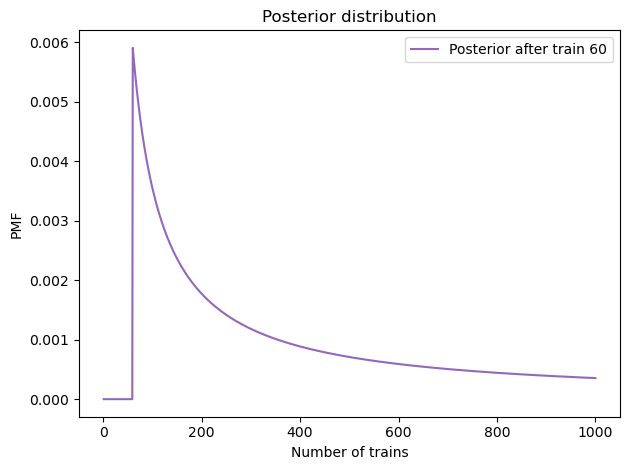

In [11]:
def update_train(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)    

data = 60
posterior = prior.copy()
update_train(posterior, data)

from utils import decorate

posterior.plot(label='Posterior after train 60', color='C4')
decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior distribution')

display(f'max prob: {posterior.max_prob()}')
display(f"posterior mean: {posterior.mean()}")


In [12]:
import pandas as pd

df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    update_train(pmf, data=60)
    df.loc[high] = pmf.mean()
    
df

,Posterior mean
Upper bound,
500,207.079228
1000,333.419893
2000,552.179017


,Posterior mean
Upper bound,
500,111.786849


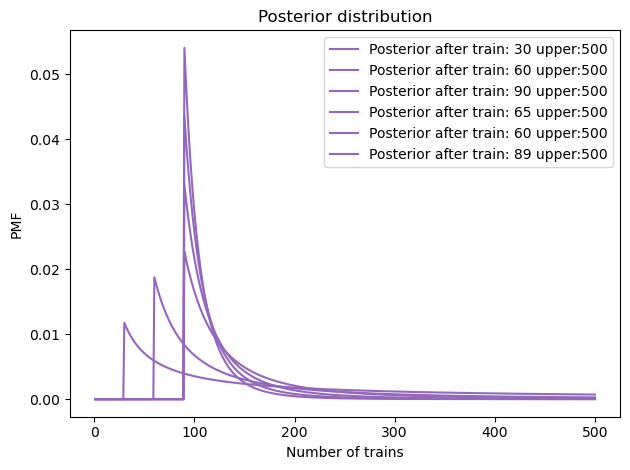

In [21]:
df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    for data in dataset:
        update_train(pmf, data)
        pmf.plot(label=f'Posterior after train: {data} upper:{high}', color='C4')
        decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior distribution')
        
    df.loc[high] = pmf.mean()
    
df